<a href="https://colab.research.google.com/github/signLangProjectNIC/tf-cnn-lstm4/blob/main/tf_cnn_lstm18_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.9.111.154:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.9.111.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.9.111.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
from moviepy.editor import *
import cv2
import moviepy
import sys
import tensorflow.keras.layers as tfKL
from tensorflow.keras import regularizers
from keras.layers import Activation, Dense 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import random
import pandas as pd
nLookback=4
nSubsequences= 5
height=50
width=50
channels=3
nCategories=8
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
X=np.load("/content/gdrive/MyDrive/hand sign database array X.npy")
Y=np.load("/content/gdrive/MyDrive/hand sign database array Y.npy")
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
X=(X-Xmean)/Xstd
nCategories=8
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
trainSetX=list()
testSetX=list()
trainSetY=list()
testSetY=list()
valSetX=list()
valSetY=list()
for i in range(nCategories):
  wholeset=list()
  for j in range(np.shape(Y)[0]):
    if(Y[j]==i):
      wholeset.append(j)
  # idk=X[wholeset]
  print(np.shape(wholeset))
  traini,testnvali=train_test_split(wholeset,test_size=0.25)
  vali,testi=train_test_split(testnvali,test_size=(10/35))
  for x in traini:
    trainSetX.append(X[x])
    trainSetY.append(Y[x])
  for x in testi:
    testSetX.append(X[x])
    testSetY.append(Y[x])
  for x in vali:
    valSetX.append(X[x])
    valSetY.append(Y[x])
print(np.shape(trainSetX))
print(np.shape(valSetX))
print(np.shape(testSetX))

76.08792970149254
37.221323957827764
-7.58063079786192e-17
0.9999999999999996
(52,)
(52,)
(52,)
(52,)
(52,)
(40,)
(52,)
(50,)
(301, 20, 50, 50, 3)
(70, 20, 50, 50, 3)
(31, 20, 50, 50, 3)


In [4]:
def createModel(layers,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam'):
  with tpu_strategy.scope():
    model=tf.keras.Sequential()
    for layer in layers:
      model.add(layer)
    model.compile(metrics=metrics,loss=loss,optimizer=optimizer)    
    return model

In [5]:
def evaluateModel(layers,trainX=trainSetX,trainY=trainSetY,valX=valSetX,valY=valSetY,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam',nSubsequences=5,nLookback=4,nCategories=8,verbose=2,epochs=500,batch_size=10):
  
  with tpu_strategy.scope(): 
    trainX=np.asarray(trainX)
    trainY=np.asarray(trainY)
    valX=np.asarray(valX)
    valY=np.asarray(valY)
    height=trainX.shape[2]
    width=trainX.shape[3]
    channels=trainX.shape[4]
    trainX=trainX.reshape((trainX.shape[0],nSubsequences,nLookback,trainX.shape[2],trainX.shape[3],trainX.shape[4]))
    trainY=tf.keras.utils.to_categorical(trainY)

    
    valX=valX.reshape((valX.shape[0],nSubsequences,nLookback,valX.shape[2],valX.shape[3],valX.shape[4]))
    valY=tf.keras.utils.to_categorical(valY)
  print(np.shape(trainX))
  print(np.shape(trainY))
  print(np.shape(valX))
  print(np.shape(valY))
  with tpu_strategy.scope():
    model=createModel(layers=layers,metrics=metrics,loss=loss,optimizer=optimizer)
    # print(trainX)
    history=model.fit(x=trainX,y=trainY,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_data =(valX,valY))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
  return model

In [6]:
def testAccuracy(Result,testSetY=testSetY):
  diff=np.asarray(Result)-np.asarray(testSetY)
  answer=(((np.shape(diff))[0]-np.count_nonzero(diff)))/(np.shape(diff)[0])
  return answer

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 30s - loss: 3.1124 - accuracy: 0.4153 - val_loss: 2.4024 - val_accuracy: 0.3429
Epoch 2/500
31/31 - 5s - loss: 1.9832 - accuracy: 0.4718 - val_loss: 1.7635 - val_accuracy: 0.5143
Epoch 3/500
31/31 - 5s - loss: 1.4502 - accuracy: 0.6146 - val_loss: 1.5026 - val_accuracy: 0.5286
Epoch 4/500
31/31 - 5s - loss: 1.2563 - accuracy: 0.6312 - val_loss: 1.6464 - val_accuracy: 0.4286
Epoch 5/500
31/31 - 5s - loss: 1.2988 - accuracy: 0.6113 - val_loss: 1.4081 - val_accuracy: 0.6143
Epoch 6/500
31/31 - 5s - loss: 1.1402 - accuracy: 0.6977 - val_loss: 1.3263 - val_accuracy: 0.6571
Epoch 7/500
31/31 - 5s - loss: 1.0654 - accuracy: 0.7475 - val_loss: 1.2406 - val_accuracy: 0.6143
Epoch 8/500
31/31 - 5s - loss: 0.9269 - accuracy: 0.7375 - val_loss: 1.1959 - val_accuracy: 0.6000
Epoch 9/500
31/31 - 5s - loss: 0.8838 - accuracy: 0.7276 - val_loss: 1.1301 - val_accuracy: 0.7429
Epoch 10/500
31/31 - 5s - loss: 0.8169 - accur

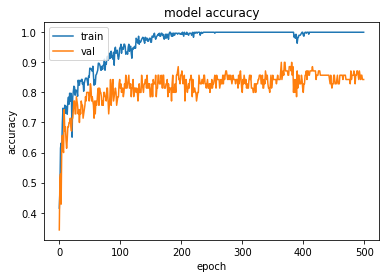

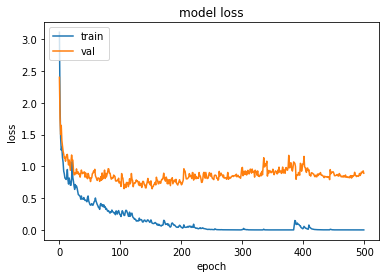

 Our result:- 
 [0 0 0 0 1 1 6 1 2 2 2 2 3 3 3 3 4 4 4 6 5 0 5 6 6 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.9032258064516129


In [7]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=80,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=160,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 30s - loss: 3.6129 - accuracy: 0.3256 - val_loss: 2.2177 - val_accuracy: 0.4286
Epoch 2/500
31/31 - 5s - loss: 1.8230 - accuracy: 0.5017 - val_loss: 1.5514 - val_accuracy: 0.5429
Epoch 3/500
31/31 - 5s - loss: 1.4517 - accuracy: 0.5415 - val_loss: 1.4016 - val_accuracy: 0.5286
Epoch 4/500
31/31 - 5s - loss: 1.2343 - accuracy: 0.6213 - val_loss: 1.2217 - val_accuracy: 0.6000
Epoch 5/500
31/31 - 5s - loss: 1.0637 - accuracy: 0.6910 - val_loss: 1.1193 - val_accuracy: 0.7143
Epoch 6/500
31/31 - 5s - loss: 1.0188 - accuracy: 0.6910 - val_loss: 1.1196 - val_accuracy: 0.7714
Epoch 7/500
31/31 - 5s - loss: 1.0576 - accuracy: 0.7010 - val_loss: 1.1513 - val_accuracy: 0.7000
Epoch 8/500
31/31 - 5s - loss: 0.9661 - accuracy: 0.7608 - val_loss: 1.0596 - val_accuracy: 0.7571
Epoch 9/500
31/31 - 5s - loss: 0.9130 - accuracy: 0.7475 - val_loss: 0.9939 - val_accuracy: 0.7143
Epoch 10/500
31/31 - 5s - loss: 0.7990 - accur

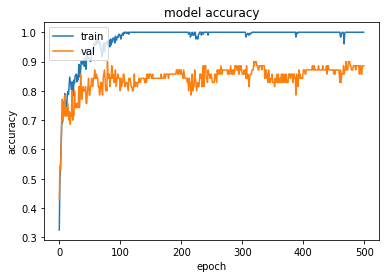

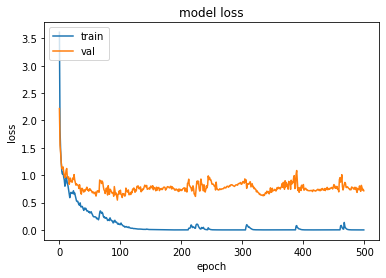

 Our result:- 
 [0 0 0 0 1 1 6 1 2 2 2 2 3 3 3 3 4 4 4 6 5 0 5 6 6 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.9032258064516129


In [9]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=70,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=160,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 18s - loss: 3.4274 - accuracy: 0.2591 - val_loss: 2.5101 - val_accuracy: 0.3143
Epoch 2/500
31/31 - 3s - loss: 2.0328 - accuracy: 0.4518 - val_loss: 1.8371 - val_accuracy: 0.4714
Epoch 3/500
31/31 - 3s - loss: 1.6311 - accuracy: 0.5847 - val_loss: 1.6391 - val_accuracy: 0.5714
Epoch 4/500
31/31 - 3s - loss: 1.3924 - accuracy: 0.5980 - val_loss: 1.4889 - val_accuracy: 0.5714
Epoch 5/500
31/31 - 3s - loss: 1.2653 - accuracy: 0.6346 - val_loss: 1.3095 - val_accuracy: 0.6429
Epoch 6/500
31/31 - 3s - loss: 1.1780 - accuracy: 0.7076 - val_loss: 1.3278 - val_accuracy: 0.6429
Epoch 7/500
31/31 - 3s - loss: 1.1107 - accuracy: 0.7143 - val_loss: 1.3566 - val_accuracy: 0.6000
Epoch 8/500
31/31 - 4s - loss: 1.0723 - accuracy: 0.6977 - val_loss: 1.2914 - val_accuracy: 0.6429
Epoch 9/500
31/31 - 3s - loss: 1.0460 - accuracy: 0.7209 - val_loss: 1.1664 - val_accuracy: 0.6857
Epoch 10/500
31/31 - 3s - loss: 0.9604 - accur

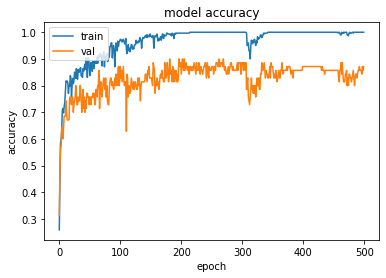

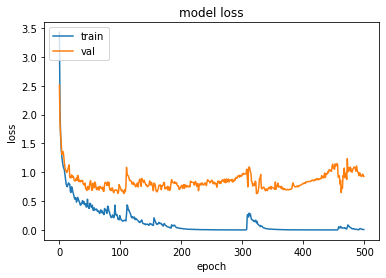

 Our result:- 
 [0 0 0 0 6 1 6 1 2 2 2 2 3 3 3 3 4 4 4 6 5 4 5 6 6 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.8709677419354839


In [12]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=112,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 30s - loss: 3.8893 - accuracy: 0.1595 - val_loss: 2.6986 - val_accuracy: 0.2143
Epoch 2/500
31/31 - 3s - loss: 2.2324 - accuracy: 0.3123 - val_loss: 2.0439 - val_accuracy: 0.2571
Epoch 3/500
31/31 - 3s - loss: 1.8835 - accuracy: 0.3189 - val_loss: 1.7675 - val_accuracy: 0.3143
Epoch 4/500
31/31 - 3s - loss: 1.6578 - accuracy: 0.4385 - val_loss: 1.6368 - val_accuracy: 0.5857
Epoch 5/500
31/31 - 3s - loss: 1.5645 - accuracy: 0.5083 - val_loss: 1.5611 - val_accuracy: 0.5429
Epoch 6/500
31/31 - 3s - loss: 1.5140 - accuracy: 0.5681 - val_loss: 1.6153 - val_accuracy: 0.5000
Epoch 7/500
31/31 - 3s - loss: 1.4126 - accuracy: 0.6279 - val_loss: 1.4598 - val_accuracy: 0.6000
Epoch 8/500
31/31 - 3s - loss: 1.3810 - accuracy: 0.6910 - val_loss: 1.4697 - val_accuracy: 0.6286
Epoch 9/500
31/31 - 3s - loss: 1.3002 - accuracy: 0.6811 - val_loss: 1.3575 - val_accuracy: 0.6429
Epoch 10/500
31/31 - 3s - loss: 1.2381 - accur

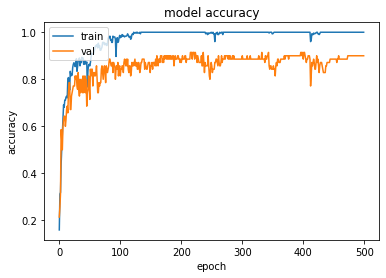

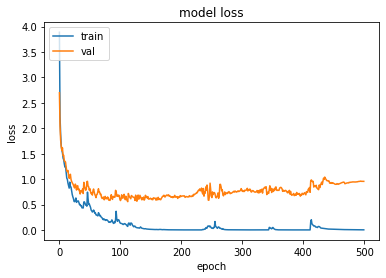

 Our result:- 
 [0 0 0 0 1 1 6 1 2 2 2 2 3 3 3 3 4 4 4 6 5 4 5 6 6 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.9032258064516129


In [13]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=67,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 17s - loss: 3.6139 - accuracy: 0.1462 - val_loss: 2.6604 - val_accuracy: 0.1857
Epoch 2/500
31/31 - 3s - loss: 2.2818 - accuracy: 0.2890 - val_loss: 2.0650 - val_accuracy: 0.3429
Epoch 3/500
31/31 - 3s - loss: 1.8903 - accuracy: 0.4086 - val_loss: 1.7725 - val_accuracy: 0.4143
Epoch 4/500
31/31 - 3s - loss: 1.7347 - accuracy: 0.5083 - val_loss: 1.7320 - val_accuracy: 0.5429
Epoch 5/500
31/31 - 3s - loss: 1.6429 - accuracy: 0.5083 - val_loss: 1.7062 - val_accuracy: 0.5429
Epoch 6/500
31/31 - 3s - loss: 1.5323 - accuracy: 0.6312 - val_loss: 1.5578 - val_accuracy: 0.5143
Epoch 7/500
31/31 - 3s - loss: 1.4166 - accuracy: 0.6213 - val_loss: 1.4749 - val_accuracy: 0.6571
Epoch 8/500
31/31 - 3s - loss: 1.3711 - accuracy: 0.6611 - val_loss: 1.5722 - val_accuracy: 0.5429
Epoch 9/500
31/31 - 3s - loss: 1.3362 - accuracy: 0.6910 - val_loss: 1.3623 - val_accuracy: 0.7143
Epoch 10/500
31/31 - 3s - loss: 1.1960 - accur

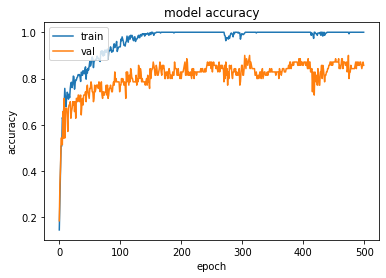

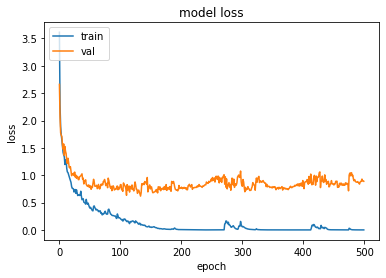

 Our result:- 
 [0 0 0 0 6 1 6 1 2 2 2 2 3 3 3 3 4 4 4 6 5 1 5 6 6 4 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.8387096774193549


In [15]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=93,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 17s - loss: 3.4109 - accuracy: 0.1960 - val_loss: 2.5063 - val_accuracy: 0.2571
Epoch 2/500
31/31 - 3s - loss: 1.9985 - accuracy: 0.4286 - val_loss: 1.8602 - val_accuracy: 0.4286
Epoch 3/500
31/31 - 3s - loss: 1.5776 - accuracy: 0.5083 - val_loss: 1.5577 - val_accuracy: 0.4714
Epoch 4/500
31/31 - 3s - loss: 1.3840 - accuracy: 0.5748 - val_loss: 1.3528 - val_accuracy: 0.5714
Epoch 5/500
31/31 - 3s - loss: 1.2184 - accuracy: 0.6744 - val_loss: 1.3399 - val_accuracy: 0.5857
Epoch 6/500
31/31 - 3s - loss: 1.1795 - accuracy: 0.6611 - val_loss: 1.3673 - val_accuracy: 0.5571
Epoch 7/500
31/31 - 3s - loss: 1.1425 - accuracy: 0.6777 - val_loss: 1.2875 - val_accuracy: 0.5429
Epoch 8/500
31/31 - 3s - loss: 1.0353 - accuracy: 0.7342 - val_loss: 1.2535 - val_accuracy: 0.7000
Epoch 9/500
31/31 - 3s - loss: 1.0092 - accuracy: 0.7508 - val_loss: 1.1999 - val_accuracy: 0.6429
Epoch 10/500
31/31 - 3s - loss: 1.0158 - accur

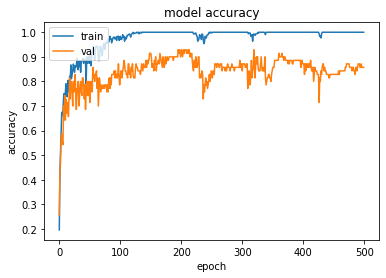

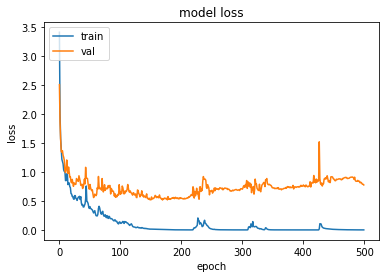

 Our result:- 
 [0 0 0 0 1 1 6 1 2 2 2 2 3 3 3 3 6 4 4 6 5 0 5 6 6 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.8709677419354839


In [16]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 30s - loss: 3.3395 - accuracy: 0.4286 - val_loss: 2.2764 - val_accuracy: 0.5143
Epoch 2/500
31/31 - 4s - loss: 1.7780 - accuracy: 0.5781 - val_loss: 1.4843 - val_accuracy: 0.6286
Epoch 3/500
31/31 - 4s - loss: 1.2696 - accuracy: 0.6711 - val_loss: 1.3678 - val_accuracy: 0.6286
Epoch 4/500
31/31 - 4s - loss: 1.1236 - accuracy: 0.7276 - val_loss: 1.3433 - val_accuracy: 0.6286
Epoch 5/500
31/31 - 4s - loss: 1.0775 - accuracy: 0.7143 - val_loss: 1.1460 - val_accuracy: 0.7000
Epoch 6/500
31/31 - 4s - loss: 0.8925 - accuracy: 0.7807 - val_loss: 1.1304 - val_accuracy: 0.7000
Epoch 7/500
31/31 - 4s - loss: 0.8749 - accuracy: 0.7841 - val_loss: 1.0901 - val_accuracy: 0.6714
Epoch 8/500
31/31 - 4s - loss: 0.8479 - accuracy: 0.7508 - val_loss: 1.1166 - val_accuracy: 0.6143
Epoch 9/500
31/31 - 4s - loss: 0.8544 - accuracy: 0.7276 - val_loss: 1.0456 - val_accuracy: 0.6429
Epoch 10/500
31/31 - 5s - loss: 0.7820 - accur

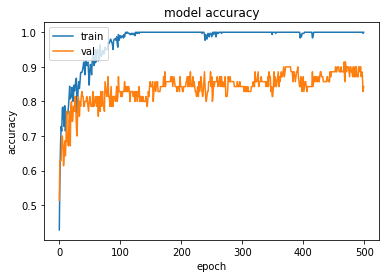

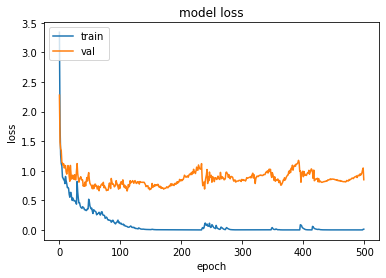

 Our result:- 
 [0 0 0 0 1 1 6 1 2 2 2 2 3 3 3 3 4 4 4 4 5 4 5 6 6 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.9354838709677419


In [10]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=160,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 29s - loss: 4.0226 - accuracy: 0.2525 - val_loss: 2.5295 - val_accuracy: 0.3857
Epoch 2/500
31/31 - 4s - loss: 2.0611 - accuracy: 0.4419 - val_loss: 1.8583 - val_accuracy: 0.5286
Epoch 3/500
31/31 - 4s - loss: 1.6260 - accuracy: 0.6146 - val_loss: 1.6211 - val_accuracy: 0.5571
Epoch 4/500
31/31 - 4s - loss: 1.5514 - accuracy: 0.5880 - val_loss: 1.4734 - val_accuracy: 0.6571
Epoch 5/500
31/31 - 4s - loss: 1.3929 - accuracy: 0.6179 - val_loss: 1.5385 - val_accuracy: 0.5429
Epoch 6/500
31/31 - 4s - loss: 1.3307 - accuracy: 0.5880 - val_loss: 1.4712 - val_accuracy: 0.5286
Epoch 7/500
31/31 - 4s - loss: 1.1990 - accuracy: 0.6645 - val_loss: 1.3052 - val_accuracy: 0.6857
Epoch 8/500
31/31 - 4s - loss: 1.0969 - accuracy: 0.7043 - val_loss: 1.2916 - val_accuracy: 0.6286
Epoch 9/500
31/31 - 4s - loss: 0.9831 - accuracy: 0.7110 - val_loss: 1.1548 - val_accuracy: 0.6429
Epoch 10/500
31/31 - 4s - loss: 0.9024 - accur

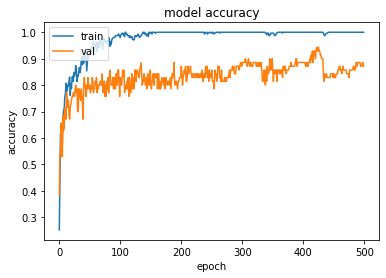

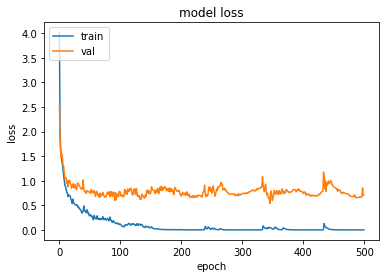

 Our result:- 
 [0 0 0 0 1 1 6 1 2 2 2 2 3 3 3 3 4 4 4 6 5 5 5 6 6 4 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.9032258064516129


In [11]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=150,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 30s - loss: 3.2870 - accuracy: 0.3289 - val_loss: 2.1052 - val_accuracy: 0.5714
Epoch 2/500
31/31 - 4s - loss: 1.8427 - accuracy: 0.5382 - val_loss: 1.4628 - val_accuracy: 0.6286
Epoch 3/500
31/31 - 4s - loss: 1.4955 - accuracy: 0.5947 - val_loss: 1.2826 - val_accuracy: 0.7857
Epoch 4/500
31/31 - 4s - loss: 1.3154 - accuracy: 0.6213 - val_loss: 1.0757 - val_accuracy: 0.7286
Epoch 5/500
31/31 - 4s - loss: 1.1152 - accuracy: 0.7276 - val_loss: 0.9580 - val_accuracy: 0.7857
Epoch 6/500
31/31 - 4s - loss: 1.1224 - accuracy: 0.7143 - val_loss: 1.0187 - val_accuracy: 0.7429
Epoch 7/500
31/31 - 4s - loss: 1.0049 - accuracy: 0.6944 - val_loss: 0.8907 - val_accuracy: 0.7571
Epoch 8/500
31/31 - 4s - loss: 0.9127 - accuracy: 0.7475 - val_loss: 0.8939 - val_accuracy: 0.7571
Epoch 9/500
31/31 - 4s - loss: 0.8780 - accuracy: 0.7475 - val_loss: 0.9609 - val_accuracy: 0.7571
Epoch 10/500
31/31 - 4s - loss: 0.8930 - accur

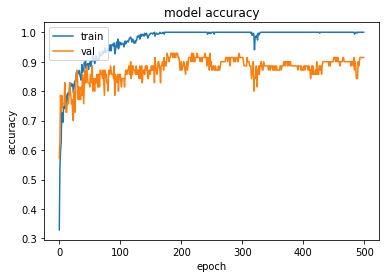

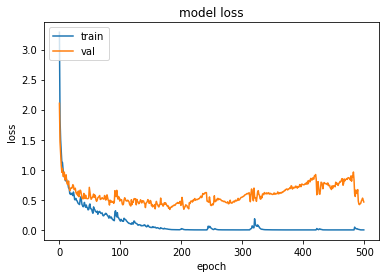

 Our result:- 
 [0 0 0 0 6 1 1 1 2 2 2 2 3 3 3 3 4 4 1 6 7 5 5 6 6 6 6 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.8709677419354839


In [7]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=146,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 30s - loss: 3.2833 - accuracy: 0.3289 - val_loss: 2.3428 - val_accuracy: 0.3143
Epoch 2/500
31/31 - 4s - loss: 1.9522 - accuracy: 0.4983 - val_loss: 1.5148 - val_accuracy: 0.6143
Epoch 3/500
31/31 - 4s - loss: 1.5228 - accuracy: 0.6512 - val_loss: 1.5551 - val_accuracy: 0.5429
Epoch 4/500
31/31 - 4s - loss: 1.4111 - accuracy: 0.6246 - val_loss: 1.2930 - val_accuracy: 0.6571
Epoch 5/500
31/31 - 4s - loss: 1.2637 - accuracy: 0.6977 - val_loss: 1.1531 - val_accuracy: 0.7286
Epoch 6/500
31/31 - 4s - loss: 1.0849 - accuracy: 0.7542 - val_loss: 1.1099 - val_accuracy: 0.7143
Epoch 7/500
31/31 - 4s - loss: 1.1328 - accuracy: 0.7043 - val_loss: 1.1229 - val_accuracy: 0.7000
Epoch 8/500
31/31 - 4s - loss: 1.1359 - accuracy: 0.6711 - val_loss: 1.0751 - val_accuracy: 0.6286
Epoch 9/500
31/31 - 4s - loss: 0.9206 - accuracy: 0.7209 - val_loss: 0.8833 - val_accuracy: 0.6714
Epoch 10/500
31/31 - 4s - loss: 0.8494 - accur

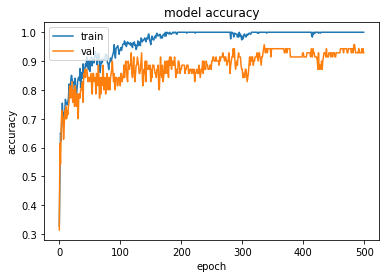

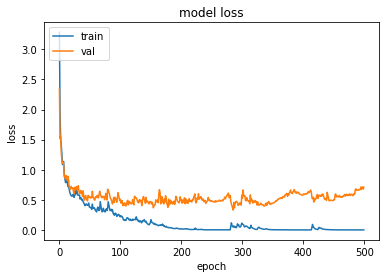

 Our result:- 
 [0 0 0 0 6 1 1 1 2 2 2 2 3 3 3 3 4 4 4 6 3 5 4 6 6 6 4 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.8387096774193549


In [8]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=144,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
31/31 - 29s - loss: 3.1753 - accuracy: 0.3422 - val_loss: 2.2538 - val_accuracy: 0.4429
Epoch 2/500
31/31 - 4s - loss: 1.8592 - accuracy: 0.5615 - val_loss: 1.6040 - val_accuracy: 0.5429
Epoch 3/500
31/31 - 4s - loss: 1.4217 - accuracy: 0.6545 - val_loss: 1.4542 - val_accuracy: 0.5714
Epoch 4/500
31/31 - 4s - loss: 1.2492 - accuracy: 0.6578 - val_loss: 1.2026 - val_accuracy: 0.6571
Epoch 5/500
31/31 - 4s - loss: 1.1199 - accuracy: 0.6877 - val_loss: 1.0343 - val_accuracy: 0.7571
Epoch 6/500
31/31 - 4s - loss: 1.0024 - accuracy: 0.7243 - val_loss: 0.9864 - val_accuracy: 0.8143
Epoch 7/500
31/31 - 4s - loss: 0.8698 - accuracy: 0.7741 - val_loss: 0.8899 - val_accuracy: 0.7571
Epoch 8/500
31/31 - 4s - loss: 0.7723 - accuracy: 0.7940 - val_loss: 0.8832 - val_accuracy: 0.7286
Epoch 9/500
31/31 - 4s - loss: 0.7716 - accuracy: 0.8073 - val_loss: 0.8518 - val_accuracy: 0.8000
Epoch 10/500
31/31 - 4s - loss: 0.8456 - accur

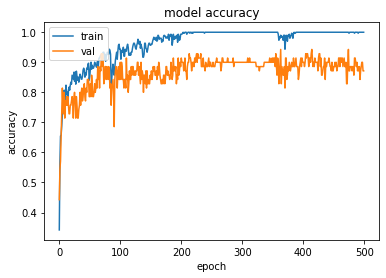

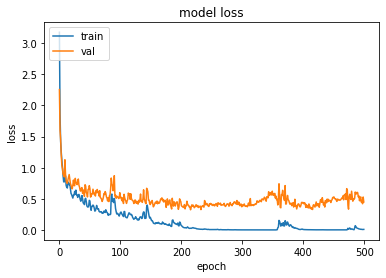

 Our result:- 
 [0 0 0 0 6 1 1 1 2 2 2 2 3 3 3 3 4 4 4 6 7 5 5 6 6 6 1 7 7 7 7]
Real testY:- 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]
Accuracy:- 
 0.8709677419354839


In [11]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=142,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

In [ ]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=66,kernel_size=(3,3,3),activation='relu',trainable=True,kernel_regularizer=regularizers.l2(l2=0.3)),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=141,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))


with tpu_strategy.scope(): 
  Result=evaluateModel(layers).predict(np.reshape(np.asarray(testSetX),newshape=(31,nSubsequences,nLookback,50,50,3)))
  Result=np.argmax(Result,axis=1)
  print(" Our result:- \n",Result)
  print("Real testY:- \n",testSetY)
  print("Accuracy:- \n",testAccuracy(Result,testSetY))

(301, 5, 4, 50, 50, 3)
(301, 8)
(70, 5, 4, 50, 50, 3)
(70, 8)
Epoch 1/500
